In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from matplotlib import patches
from sklearn import metrics
import os
import sys
import itertools
from pathlib import Path
import pickle
from codebase.utils import compute_boxes,compute_iou,min_dist
from codebase.Accuracy import AccuracyRunnerApprox
from Optimization_Methods.GlowWorm import GlowWorm

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


In [4]:
import logging
logging.basicConfig(stream=sys.stdout, level=logging.ERROR,)
logger = logging.getLogger(__name__)

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
result_details = []
#Load models and run experiments
directory = os.fsencode('models')
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if not filename.startswith('queries'):
        continue;
    logger.debug(filename)
    a = filename.split('-')
    dims = int(a[2])
    multi = a[3].split('_')[1]=="True"
    aggr = a[4]
    m = None
    
    with open('models/%s' % filename, 'rb') as file:  
        m = pickle.load(file)
        
    ac = AccuracyRunnerApprox(dims,multi, aggr,m)
    proposed = ac.run_test()
    iou_metric, avg_min_dist = ac.check_accuracy(proposed)
#     r2 =  float(a[7].split('=')[1][:4])
#     print(a[7].split('=')[1][:4])
    rmse =  float(a[6].split('=')[1])
    model_name = a[5]
    result_details.append([dims,multi,aggr,model_name, rmse, iou_metric ,avg_min_dist])

DEBUG:__main__:queries-uniform-1-multi_False-aggr-XGB-RMSE=0.33-R2=0.96.pkl
[17:47:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
INFO:__main__:Starting Optimization
DEBUG:__main__:length of IOUs 20
INFO:__main__:Maximum IOU of proposed boxes 0.869817
INFO:__main__:Average Minimum Distance 0.32
INFO:__main__:Finished Run =======================================
DEBUG:__main__:queries-uniform-1-multi_False-density-XGB-RMSE=54.76-R2=0.98.pkl
[17:47:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
INFO:__main__:Starting Optimization
DEBUG:__main__:length of IOUs 20
INFO:__main__:Maximum IOU of proposed boxes 0.602372
INFO:__main__:Average Minimum Distance 0.37
INFO:__main__:Finished Run =======================================
DEBUG:__main__:queries-uniform-1-multi_True-aggr-X

INFO:__main__:Maximum IOU for box 3 is : 0.065975
INFO:__main__:Average Minimum Distance 0.98
INFO:__main__:Finished Run =======================================
DEBUG:__main__:queries-uniform-5-multi_False-aggr-XGB-RMSE=0.15-R2=0.36.pkl
[17:49:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
INFO:__main__:Starting Optimization
DEBUG:__main__:length of IOUs 20
INFO:__main__:Maximum IOU of proposed boxes 0.059831
INFO:__main__:Average Minimum Distance 0.90
INFO:__main__:Finished Run =======================================
DEBUG:__main__:queries-uniform-5-multi_False-density-XGB-RMSE=17.73-R2=0.99.pkl
[17:49:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
INFO:__main__:Starting Optimization
DEBUG:__main__:length of IOUs 20
INFO:__main__:Maximum IOU of proposed boxes 0.016871


In [7]:
eval_df = pd.DataFrame(result_details, columns=['dimensions','multiple_regions','type of aggr', 'model','rmse', 'iou', 'avg_min_dist'])

In [8]:
eval_df

,dimensions,multiple_regions,type of aggr,model,rmse,iou,avg_min_dist
0,1,False,aggr,XGB,0.33,0.869817,0.318550
1,1,False,density,XGB,54.76,0.602372,0.368399
2,1,True,aggr,XGB,0.57,0.490575,0.441774
3,1,True,density,XGB,169.63,0.659489,0.416364
4,2,False,aggr,XGB,0.19,0.270103,0.641974
5,2,False,density,XGB,64.76,0.303297,0.544744
6,2,True,aggr,XGB,0.31,0.195672,0.622887
7,2,True,density,XGB,193.80,0.294497,0.638676
8,3,False,aggr,XGB,0.12,0.120437,0.715427
9,3,False,density,XGB,47.83,0.087281,0.747612


DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Niagara Engraved' (NIAGENG.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Old English Text MT' (OLDENGL.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Bright' (LBRITE.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbel.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ravie' (RAVIE.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Eras Bold ITC' (ERAS

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Niagara Solid' (NIAGSOL.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Agency FB' (AGENCYR.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Harrington' (HARNGTON.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Rockwell' (ROCKB.TTF) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Franklin Gothic Demi' (FRADM.TTF) normal normal demi normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe Script' (segoesc.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Footlight MT Light' (FTLTLT.TTF) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Iwona Cond' (IwonaCond-Bold.otf) normal normal bold condensed>) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Goudy Old Style' (GOUDOSB.TTF) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Rockwell Condensed' (ROCCB___.TTF) normal normal bold condensed>) = 10.535
DEBUG:matplotlib.font_ma

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Candara' (Candara.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Franklin Gothic Demi Cond' (FRADMCN.TTF) normal normal demi condensed>) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Tai Le' (taileb.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Rage Italic' (RAGE.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bernard MT Condensed' (BERNHC.TTF) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbeli.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Iwon

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial Rounded MT Bold' (ARLRDBD.TTF) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 1.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguibl.ttf) normal normal black normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MS Gothic' (msgothic.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Iwona Cond' (IwonaCond-BoldItalic.otf) italic normal bold condensed>) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'W

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 2.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 3.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bodoni MT' (BOD_CBI.TTF) italic normal bold condensed>) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'High Tower Text' (HTOWERT.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tw Cen MT' (TCM_____.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal book normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Iwona' (Iwona-Bold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Century Schoolbook' (SCHLBKBI.TTF) italic normal book normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Broadw

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tw Cen MT Condensed' (TCCM____.TTF) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Goudy Old Style' (GOUDOSI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bell MT' (BELL.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 1.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) normal normal demi normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Informal Roman' (INFROMAN.TTF) normal normal roman normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Iwona Cond' (IwonaCond-Regular.otf) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<F

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Bright' (LBRITED.TTF) normal normal demibold normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Yu Gothic' (YuGothR.ttc) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft JhengHei' (msjhl.ttc) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Freestyle Script

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal light normal>) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Tai Le' (taile.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Sans' (LSANSI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Berlin Sans FB' (BRLNSR.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Baskerville Old Face' (BASKV

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Uighur' (MSUIGHUR.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gill Sans MT Ext Condensed Bold' (GLSNECB.TTF) normal normal bold condensed>) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Franklin Gothic Medium' (framd.ttf) normal normal medium normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal light normal>) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Iwona Medium' (IwonaMedium-Italic.otf) italic normal medium normal>) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Snap ITC' (SNAP____.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Consolas' (consolaz.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manage

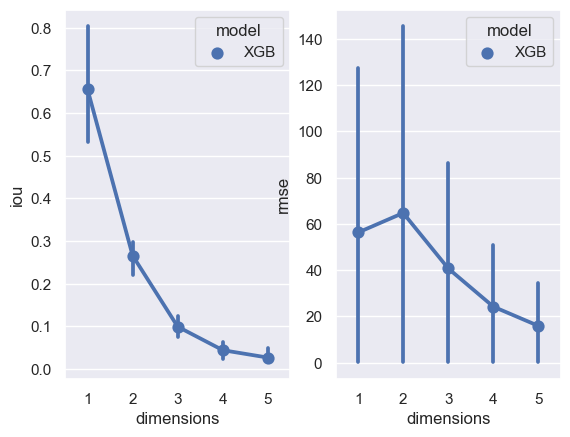

In [9]:
fig = plt.figure()
ax = fig.add_subplot(121)
sns.pointplot(x='dimensions', y='iou', hue='model', data=eval_df, ax=ax)
ax = fig.add_subplot(122)
sns.pointplot(x='dimensions', y='rmse', hue='model', data=eval_df, ax=ax)

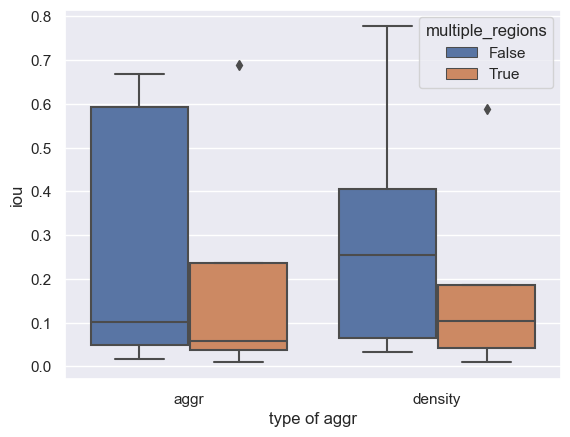

In [9]:
sns.boxplot(x='type of aggr',y='iou',hue='multiple_regions', data=eval_df)

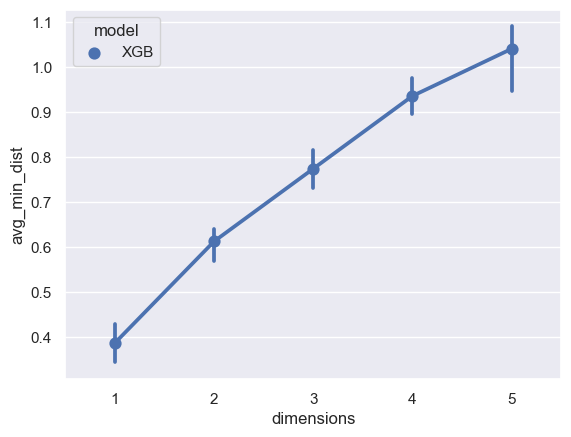

In [10]:
sns.pointplot(x='dimensions', y='avg_min_dist', hue='model', data=eval_df)

In [11]:
#Multi-modal boxes regions are : [0,0.2]^d, [0.3,0.5]^d, [0.6,0.8]^d
#Single regions : [0.6,0.9]^d
#Defined by Multi

#Evaluation metrics are F-Score and IOU
#IOU = Intersection Over Union, ie the overlap of the proposed region and the actual regions divided by the total covered region
#F-Score : the defined region covers a number of points F-Score, in which true positives are the points covered by the defined region

#Alternative methods are :
#1) PRIM
#2) Naive (exhaustive) without objective function. Get region with highest and then merge surrounding until no improvement or exceed coverage
# 3) Naive (exhaustive) with objective. Random Walk

<h2>Using PRIM</h2>

In [11]:
def load_csv_to_2d_array(filename):
    data = np.loadtxt(filename, delimiter=',')
    return data.reshape(1, -1) if len(data.shape) == 1 else data


directory = 'prim_boxes'
prim_details = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.startswith("data"):
        a =filename.split('_')
        t = a[1]
        dim = int(a[2].split('=')[1])
        multi = a[-1]=="True.csv"
        print(multi)
        #Check if query file has been generated and skip
        logger.debug('Loading file {0}'.format(filename))
        
        full_path = os.path.join(directory, file)
        proposed = load_csv_to_2d_array(full_path)
        boxes = compute_boxes(multi,dim)
        
        logger.debug('Proposed '+ np.array2string(proposed))
        iou = compute_iou(boxes, proposed, multi, dim)
        avg_min_dist = min_dist(boxes, proposed)
        prim_details.append([dim,multi,t,'prim', iou ,avg_min_dist])        

False
DEBUG:__main__:Loading file data_aggr_dimensions=1_multi_False.csv
DEBUG:__main__:Proposed [[0.58433837 0.31587461]
 [0.         1.        ]]
DEBUG:__main__:length of IOUs 2
INFO:__main__:Maximum IOU of proposed boxes 0.949744
True
DEBUG:__main__:Loading file data_aggr_dimensions=1_multi_True.csv
DEBUG:__main__:Proposed [[-8.90897812e-04  4.94170890e-01]
 [ 0.00000000e+00  1.00000000e+00]]
DEBUG:__main__:length of IOUs 6
INFO:__main__:Maximum IOU for box 1 is : 0.404718
INFO:__main__:Maximum IOU for box 2 is : 0.385872
INFO:__main__:Maximum IOU for box 3 is : 0.200000
False
DEBUG:__main__:Loading file data_aggr_dimensions=2_multi_False.csv
DEBUG:__main__:Proposed [[0.59869907 0.60246007 0.30160676 0.30453908]
 [0.70705029 0.27090312 0.24565533 0.55591224]]
DEBUG:__main__:length of IOUs 2
INFO:__main__:Maximum IOU of proposed boxes 0.964066
True
DEBUG:__main__:Loading file data_aggr_dimensions=2_multi_True.csv
DEBUG:__main__:Proposed [[0.59346088 0.49494697 0.16452561 0.3008588 ]


In [12]:
eval_df_prim = pd.DataFrame(prim_details, columns=['dimensions','multiple_regions','type of aggr', 'model', 'iou', 'avg_min_dist'])

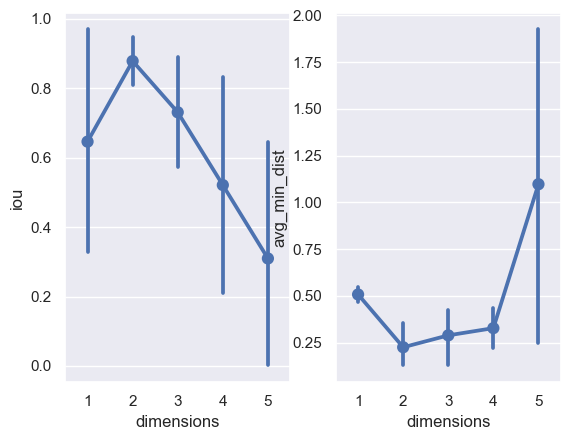

In [13]:
fig = plt.figure()
ax = fig.add_subplot(121)
sns.pointplot(x='dimensions', y='iou', data=eval_df_prim, ax=ax)
ax = fig.add_subplot(122)
sns.pointplot(x='dimensions', y='avg_min_dist', data=eval_df_prim, ax=ax)

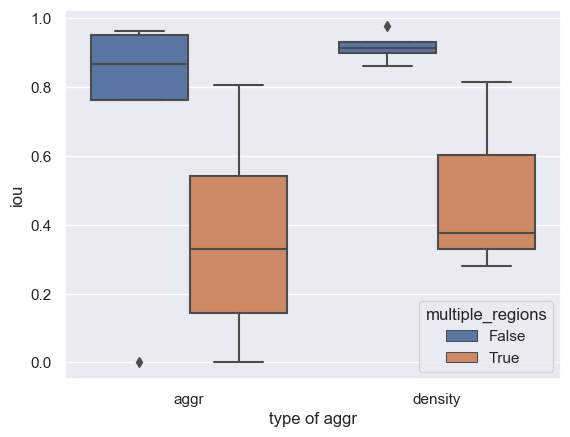

In [14]:
sns.boxplot(x='type of aggr',y='iou', hue='multiple_regions',data=eval_df_prim)

In [15]:
eval_df_prim

,dimensions,multiple_regions,type of aggr,model,iou,avg_min_dist
0,1,False,aggr,prim,0.949744,0.472127
1,1,True,aggr,prim,0.330197,0.547086
2,2,False,aggr,prim,0.964066,0.219696
3,2,True,aggr,prim,0.806463,0.134813
4,3,False,aggr,prim,0.867875,0.393820
5,3,True,aggr,prim,0.542379,0.108653
6,4,False,aggr,prim,0.763153,0.424228
7,4,True,aggr,prim,0.142801,0.292232
8,5,False,aggr,prim,0.002430,2.061553
9,5,True,aggr,prim,0.000320,1.788854


<h3>Prim + KDE</h3>

In [16]:
def load_csv_to_2d_array(filename):
    data = np.loadtxt(filename, delimiter=',')
    return data.reshape(1, -1) if len(data.shape) == 1 else data


directory = 'prim_kde'
prim_kde_details = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.startswith("data"):
        a =filename.split('_')
        t = a[1]
        dim = int(a[2].split('=')[1])
        multi = a[-1]=="True.csv"
        print(multi)
        #Check if query file has been generated and skip
        logger.debug('Loading file {0}'.format(filename))
        
        full_path = os.path.join(directory, file)
        proposed = load_csv_to_2d_array(full_path)
        boxes = compute_boxes(multi,dim)
        
        logger.debug('Proposed '+ np.array2string(proposed))
        iou = compute_iou(boxes, proposed, multi, dim)
        avg_min_dist = min_dist(boxes, proposed)
        prim_kde_details.append([dim,multi,t,'prim_kde', iou ,avg_min_dist])        

False
DEBUG:__main__:Loading file data_density_dimensions=1_multi_False.csv
DEBUG:__main__:Proposed [[0.60388015 0.31002847]
 [0.         1.        ]]
DEBUG:__main__:length of IOUs 2
INFO:__main__:Maximum IOU of proposed boxes 0.943331
True
DEBUG:__main__:Loading file data_density_dimensions=1_multi_True.csv
DEBUG:__main__:Proposed [[0.21297021 0.26385037]
 [0.         1.        ]]
DEBUG:__main__:length of IOUs 6
INFO:__main__:Maximum IOU for box 1 is : 0.200000
INFO:__main__:Maximum IOU for box 2 is : 0.616036
INFO:__main__:Maximum IOU for box 3 is : 0.200000
False
DEBUG:__main__:Loading file data_density_dimensions=2_multi_False.csv
DEBUG:__main__:Proposed [[0.60437462 0.59504775 0.30903839 0.30351227]
 [0.12005103 0.33361744 0.84493393 0.57792997]]
DEBUG:__main__:length of IOUs 2
INFO:__main__:Maximum IOU of proposed boxes 0.923870
True
DEBUG:__main__:Loading file data_density_dimensions=2_multi_True.csv
DEBUG:__main__:Proposed [[0.27615142 0.27192174 0.20508241 0.2066079 ]
 [0.0174

In [17]:
eval_df_prim_kde = pd.DataFrame(prim_kde_details, columns=['dimensions','multiple_regions','type of aggr', 'model', 'iou', 'avg_min_dist'])
eval_df_prim_kde

,dimensions,multiple_regions,type of aggr,model,iou,avg_min_dist
0,1,False,density,prim_kde,0.943331,0.466354
1,1,True,density,prim_kde,0.338679,0.453970
2,2,False,density,prim_kde,0.923870,0.416814
3,2,True,density,prim_kde,0.702645,0.072524
4,3,False,density,prim_kde,0.912033,0.391386
5,3,True,density,prim_kde,0.723900,0.043908
6,4,False,density,prim_kde,0.796780,0.186429
7,4,True,density,prim_kde,0.493378,0.068691


In [18]:
def load_csv_to_2d_array(filename):
    data = np.loadtxt(filename, delimiter=',')
    return data.reshape(1, -1) if len(data.shape) == 1 else data


directory = 'prim_dens'
prim_dens_details = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.startswith("data"):
        a =filename.split('_')
        t = a[1]
        dim = int(a[2].split('=')[1])
        multi = a[-1]=="True.csv"
        print(multi)
        #Check if query file has been generated and skip
        logger.debug('Loading file {0}'.format(filename))
        
        full_path = os.path.join(directory, file)
        proposed = load_csv_to_2d_array(full_path)
        boxes = compute_boxes(multi,dim)
        
        logger.debug('Proposed '+ np.array2string(proposed))
        iou = compute_iou(boxes, proposed, multi, dim)
        avg_min_dist = min_dist(boxes, proposed)
        prim_dens_details.append([dim,multi,t,'prim_dens', iou ,avg_min_dist])    
        
eval_df_prim_dens = pd.DataFrame(prim_dens_details, columns=['dimensions','multiple_regions','type of aggr', 'model', 'iou', 'avg_min_dist'])
eval_df_prim_dens

False
DEBUG:__main__:Loading file data_density_dimensions=1_multi_False.csv
DEBUG:__main__:Proposed [[0.59751813 0.30735687]]
DEBUG:__main__:length of IOUs 1
INFO:__main__:Maximum IOU of proposed boxes 0.976064
False
DEBUG:__main__:Loading file data_density_dimensions=2_multi_False.csv
DEBUG:__main__:Proposed [[0.59514313 0.6075855  0.30735687 0.29198902]]
DEBUG:__main__:length of IOUs 1
INFO:__main__:Maximum IOU of proposed boxes 0.950608
False
DEBUG:__main__:Loading file data_density_dimensions=3_multi_False.csv
DEBUG:__main__:Proposed [[0.60001813 0.59245802 0.59509482 0.29198902 0.30735687 0.30735687]]
DEBUG:__main__:length of IOUs 1
INFO:__main__:Maximum IOU of proposed boxes 0.927329
False
DEBUG:__main__:Loading file data_density_dimensions=4_multi_False.csv
DEBUG:__main__:Proposed [[0.59514313 0.60384055 0.6087359  0.59948184 0.30735687 0.29198902
  0.29198902 0.30735687]]
DEBUG:__main__:length of IOUs 1
INFO:__main__:Maximum IOU of proposed boxes 0.900486
False
DEBUG:__main__:L

,dimensions,multiple_regions,type of aggr,model,iou,avg_min_dist
0,1,False,density,prim_dens,0.976064,0.007764
1,2,False,density,prim_dens,0.950608,0.014122
2,3,False,density,prim_dens,0.927329,0.015917
3,4,False,density,prim_dens,0.900486,0.018749
4,5,False,density,prim_dens,0.879937,0.020934


<h3>Comparison All</h3>

In [31]:
total_df = pd.concat([eval_df,eval_df_prim_kde,eval_df_prim, eval_df_prim_dens],ignore_index=True,)

In [32]:
total_df = total_df.replace(np.nan, 0)

In [ ]:
# import datetime
# now = datetime.datetime.now()
# total_df.to_csv('output/synthetic_accuracy{0}.csv'.format(str(now)))

In [2]:
# total_df = pd.read_csv('output/synthetic_accuracy2019-05-09 15:36:22.898531.csv',index_col=0)

In [34]:
total_df['model']=total_df['model'].replace({'XGB':'SuRF','prim_kde': 'PRIM+kde', 'prim': 'PRIM', 'prim_dens': 'PRIMd'})
total_df

,avg_min_dist,dimensions,iou,model,multiple_regions,rmse,type of aggr
0,0.318550,1,0.869817,SuRF,False,0.33,aggr
1,0.368399,1,0.602372,SuRF,False,54.76,density
2,0.441774,1,0.490575,SuRF,True,0.57,aggr
3,0.416364,1,0.659489,SuRF,True,169.63,density
4,0.641974,2,0.270103,SuRF,False,0.19,aggr
5,0.544744,2,0.303297,SuRF,False,64.76,density
6,0.622887,2,0.195672,SuRF,True,0.31,aggr
7,0.638676,2,0.294497,SuRF,True,193.80,density
8,0.715427,3,0.120437,SuRF,False,0.12,aggr
9,0.747612,3,0.087281,SuRF,False,47.83,density


In [35]:
total_df['multiple'] = total_df['multiple_regions']
total_df = total_df.drop(columns=['multiple_regions'])
total_df['type of aggr']=total_df['type of aggr'].replace({'aggr':'Aggregate','density': 'Density'})
total_df['multiple']=total_df['multiple'].replace({True:'k=3',False: 'k=1'})

In [36]:
total_df.pivot_table(values='iou',index=['model','type of aggr','multiple'], columns=['dimensions'], aggfunc=lambda x:x)

dimensions                             1         2         3         4  \
model    type of aggr multiple                                           
PRIM     Aggregate    k=1       0.949744  0.964066  0.867875  0.763153   
                      k=3       0.330197  0.806463  0.542379  0.142801   
         Density      k=1       0.976091  0.929864  0.912035  0.899202   
                      k=3       0.329082  0.813271  0.601244  0.279473   
PRIM+kde Density      k=1       0.943331  0.923870  0.912033  0.796780   
                      k=3       0.338679  0.702645  0.723900  0.493378   
PRIMd    Density      k=1       0.976064  0.950608  0.927329  0.900486   
SuRF     Aggregate    k=1       0.869817  0.270103  0.120437  0.073986   
                      k=3       0.490575  0.195672  0.128242  0.020910   
         Density      k=1       0.602372  0.303297  0.087281  0.054189   
                      k=3       0.659489  0.294497  0.061406  0.028076   

dimensions                             5  
model    type of aggr multiple            
PRIM     Aggregate    k=1       0.002430  
                      k=3       0.000320  
         Density      k=1       0.859634  
                      k=3       0.376267  
PRIM+kde Density      k=1            NaN  
                      k=3            NaN  
PRIMd    Density      k=1       0.879937  
SuRF     Aggregate    k=1       0.059831  
                      k=3       0.015736  
         Density      k=1       0.016871  
                      k=3       0.015365

In [37]:
total_df.groupby(['dimensions','model'])['iou'].mean()

dimensions  model   
1           PRIM        0.646278
            PRIM+kde    0.641005
            PRIMd       0.976064
            SuRF        0.655563
2           PRIM        0.878416
            PRIM+kde    0.813257
            PRIMd       0.950608
            SuRF        0.265892
3           PRIM        0.730883
            PRIM+kde    0.817966
            PRIMd       0.927329
            SuRF        0.099342
4           PRIM        0.521157
            PRIM+kde    0.645079
            PRIMd       0.900486
            SuRF        0.044290
5           PRIM        0.309663
            PRIMd       0.879937
            SuRF        0.026951
Name: iou, dtype: float64

In [40]:
plt.style.use('seaborn-ticks')
plt.rc('text', usetex=True)
font_size=24
params = {'backend': 'ps',
          'text.latex.preamble': ['\\usepackage{gensymb}'],
          'text.usetex': True,
          'font.family': 'serif'
}

plt.rcParams.update(params)

# default_palette = sns.color_palette()
# modified_palette = [default_palette[0], default_palette[2], default_palette[1]] + default_palette[3:]
# sns.set_palette(modified_palette)

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\eb4e8d5a9dc300cc5e42f158d373c95f.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\5f9a04b7b257b87773ce86e2dc349b7a.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\eb4e8d5a9dc300cc5e42f158d373c95f.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered spe

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\eb4e8d5a9dc300cc5e42f158d373c95f.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\ada10624a87904d7fc66a54edc980419.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\eb4e8d5a9dc300cc5e42f158d373c95f.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered spe

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3e8f90260043df27d10a7600e4084135.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\543b0ef4416c487c6cf150f7ed7a2222.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3e8f90260043df27d10a7600e4084135.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered spe

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\7dcfd8d5fbbf71b5d7e1752c1a88f36c.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\ad5c0f8b4dd743476a25a91ff64925f2.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e

DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\26770254d1f6c259d80ca9ddca6ec9f0.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: pap

DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\6e6938b11cd38cba92adb874845940d5.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: pap

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3b976a7f0f185f6a234773108f971218.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\bede3960dcf622053ceea9992218a524.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered spe

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\073870b003c30127ab124935780df020.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\680d0a40378cca4fd98fcead2845a16e.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\da973d100bc5bd8fb6090af06d9776c2.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered spe

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered spe

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\b624391e20a98af2f5df6ab5c62624e5.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\ab4c485fe031faac1c85f6f02a30fc0d.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\63921e0e60dab155becca8814f68713d.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3b976a7f0f185f6a234773108f971218.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\ad5c0f8b4dd743476a25a91ff64925f2.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\6a5db4fb8f69b2ac652fd354947e0338.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\26770254d1f6c259d80ca9ddca6ec9f0.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered spe

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\073870b003c30127ab124935780df020.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.c

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\63921e0e60dab155becca8814f68713d.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3b976a7f0f185f6a234773108f971218.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.c

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\b33bb0b850c0cb18103234d243a06107.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\1e7a8c267d81b81e084bc1d65c20db9a.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a3

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\63921e0e60dab155becca8814f68713d.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3b976a7f0f185f6a234773108f971218.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\7c39aefc8d7e052c7c59b5802449a0a9.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\6e6938b11cd38cba92adb874845940d5.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\1e7a8c267d81b81e084bc1d65c20db9a.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.4399

DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3b976a7f0f185f6a234773108f971218.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\bede3960dcf622053ceea9992218a524.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered spe

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\ff663e3e6c997753fe9d269f79297762.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\ab4c485fe031faac1c85f6f02a30fc0d.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3b

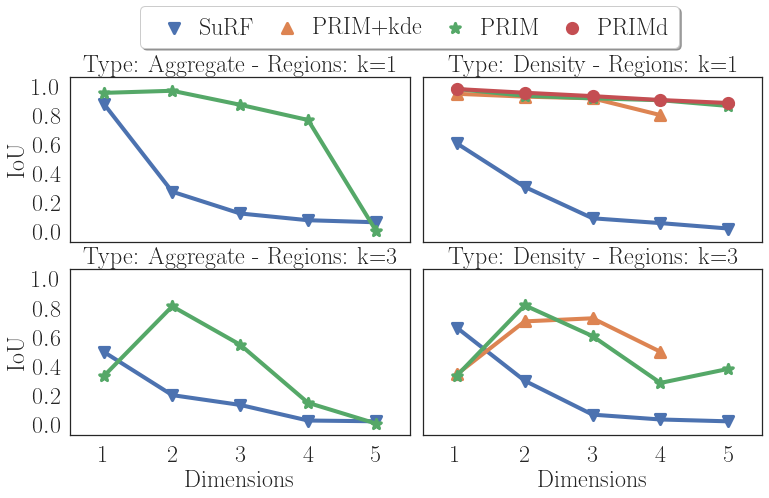

In [41]:
g= sns.catplot(x="dimensions", y="iou", hue="model",ci=False,markers=['v','^','*','o', '.'] ,scale=1.5 ,col="type of aggr",  row="multiple"
            ,despine=False,kind='point', data=total_df, legend=False,legend_out=False,height=3, aspect=1.75)
lgd = g.fig.get_axes()[0].legend(loc='upper center', bbox_to_anchor=(1, 1.5),prop={'size':24},
                                ncol=4, columnspacing=0.3, handletextpad=0.1,frameon=True,fancybox=True, shadow=True)
g.set_titles(template="Type: {col_name} - Regions: {row_name}", size=24)
g.set_xlabels(label="Dimensions", fontsize=font_size)
g.set_ylabels(label=r'IoU', fontsize=font_size)
g.set_xticklabels(labels=range(1,6),size=24)

for ax_row in g.axes:
    for ax in ax_row:
        for label in ax.get_yticklabels():
            label.set_size(24)

#g.set_yticklabels(size=18)
g.despine(top=False, right=False)

plt.savefig('output/accuracy/synthetic-four.pdf',format='pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')
#plt.savefig('output/accuracy/synthetic-four.eps',format='eps',dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [42]:
total_df['multiple'].replace({True: "k=3"})
total_df = total_df[total_df['model'].isin(['PRIM', 'SuRF'])]

In [43]:
default_palette = sns.color_palette()
modified_palette = [default_palette[0], default_palette[2], default_palette[1]] + default_palette[3:]
sns.set_palette(modified_palette)

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:['latex', '-interaction=nonstopmode', '--halt-on-error', 'C:\\Users\\arzamasov\\.matplotlib\\tex.cache\\55016ea8939ffd76d34c44e9ce03cc16.tex']
DEBUG:matplotlib.texmanager:b"This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 23.10) (preloaded format=latex.fmt)\r\n restricted \\write18 enabled.\r\nentering extended mode\r\n(C:/Users/arzamasov/.matplotlib/tex.cache/55016ea8939ffd76d34c44e9ce03cc16.tex\r\nLaT

DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\e5b7a5986eb764ee2df2f9e146f69d7e.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: pap

DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\55016ea8939ffd76d34c44e9ce03cc16.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F1' = b'cmr17' (dvi)
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\a8d5222b2f3f37e411aa47c1d1dd7aef.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\e7964dc89a236f8f63c35ac25209e19c.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\1e7a8c267d81b81e084bc1d65c20db9a.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.c

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:['dvipng', '-bg', 'Transparent', '-D', '72', '-T', 'tight', '-o', 'C:\\Users\\arzamasov\\.matplotlib\\tex.cache\\f45647102808063f234ce512e35439eb.png', 'C:\\Users\\arzamasov\\.matplotlib\\tex.cache\\a8d5222b2f3f37e411aa47c1d1dd7aef.dvi']
DEBUG:matplotlib.texmanager:b'This is dvipng 1.16 Copyright 2002-2015, 2019 Jan-Ake Larsson\r\n[1] \r\n'
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\a8d5222b2f3f37e411aa47c1d1dd7aef.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\45002a260c76968720ea55f8a909a425.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\7dcfd8d5fbbf71b5d7e1752c1a88f36c.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3b

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\45002a260c76968720ea55f8a909a425.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\7dcfd8d5fbbf71b5d7e1752c1a88f36c.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered spe

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\26770254d1f6c259d80ca9ddca6ec9f0.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt


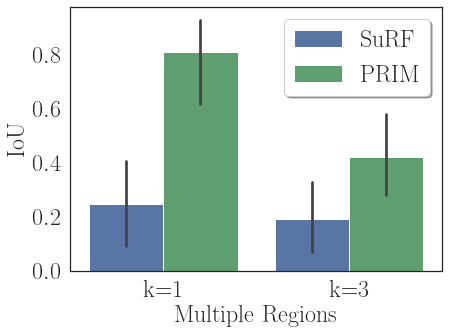

In [44]:
ax = sns.barplot(x='multiple',y='iou',hue='model', data=total_df)
ax.set_xlabel('Multiple Regions', fontsize=font_size)
ax.set_ylabel(r'IoU', fontsize=font_size)
ax.tick_params(labelsize=24)
plt.legend(prop={'size':24},shadow=True, frameon=True)
plt.tight_layout()
plt.savefig('output/accuracy/synthetic_accuracy_multiple_regions.pdf',format='pdf')
# plt.savefig('output/accuracy/synthetic_accuracy_multiple_regions.eps',format='eps', dpi=300)

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:['latex', '-interaction=nonstopmode', '--halt-on-error', 'C:\\Users\\arzamasov\\.matplotlib\\tex.cache\\980a39b327dba39277fe0974ffd0bef8.tex']
DEBUG:matplotlib.texmanager:b"This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 23.10) (preloaded format=latex.fmt)\r\n restricted \\write18 enabled.\r\nentering extended mode\r\n(C:/Users/arzamasov/.matplotlib/tex.cache/980a39b327dba39277fe0974ffd0bef8.tex\r\nLaT

DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\e5b7a5986eb764ee2df2f9e146f69d7e.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: pap

DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\980a39b327dba39277fe0974ffd0bef8.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F1' = b'cmr17' (dvi)
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\444072bb0fcb3ca664fc65873cf22e42.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\10b31f3baf0219cedd2b6d14837f5a3b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\1e7a8c267d81b81e084bc1d65c20db9a.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.c

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:['dvipng', '-bg', 'Transparent', '-D', '72', '-T', 'tight', '-o', 'C:\\Users\\arzamasov\\.matplotlib\\tex.cache\\a86e0f1f604bf3069f524d0da7ed6b42.png', 'C:\\Users\\arzamasov\\.matplotlib\\tex.cache\\444072bb0fcb3ca664fc65873cf22e42.dvi']
DEBUG:matplotlib.texmanager:b'This is dvipng 1.16 Copyright 2002-2015, 2019 Jan-Ake Larsson\r\n[1] \r\n'
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\444072bb0fcb3ca664fc65873cf22e42.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\45002a260c76968720ea55f8a909a425.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\7dcfd8d5fbbf71b5d7e1752c1a88f36c.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3b

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\45002a260c76968720ea55f8a909a425.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\3ff50e33a023f97692234361e7e0e42b.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\7dcfd8d5fbbf71b5d7e1752c1a88f36c.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered spe

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: C:\Users\arzamasov\.matplotlib\tex.cache\26770254d1f6c259d80ca9ddca6ec9f0.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: header=l3backend-dvips.pro
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt


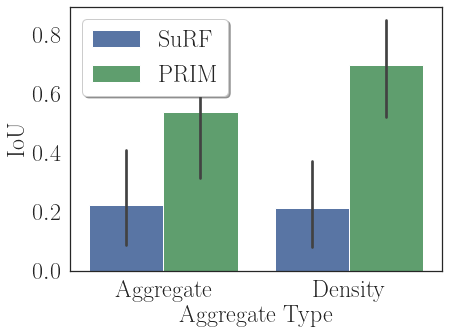

In [45]:
ax = sns.barplot(x='type of aggr',y='iou',hue='model', data=total_df)
ax.set_xlabel('Aggregate Type', fontsize=font_size)
ax.set_ylabel(r'IoU', fontsize=font_size)
ax.tick_params(labelsize=24)
plt.legend(prop={'size':24},shadow=True, frameon=True)
plt.tight_layout()
plt.savefig('output/accuracy/synthetic_accuracy_type.pdf',format='pdf')
# plt.savefig('output/accuracy/synthetic_accuracy_type.eps',format='eps', dpi=300)